***Carga de las bibliotecas***

In [66]:
import os
import math
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import plotly.express as px
from matplotlib import style
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

***Carga del dataset***

In [67]:
data = pd.read_csv("/content/drive/MyDrive/ESCOM/8vo Semestre/Data Mining/Extraordinario/insurance.csv")

X = data.iloc[:, :-1]
y = data.iloc[:, -1]

***Visualización del dataset***

In [68]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [69]:
data.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [70]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


***Comprobación de datos faltantes***

In [71]:
data.isnull().values.any()

False

***Visualización del mapa de calor***

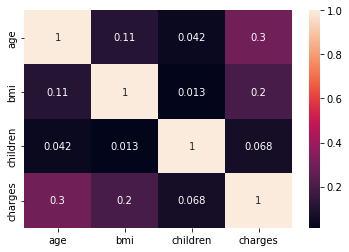

In [72]:
sns.heatmap(data.corr(),annot= True)

El mapa de calor demuestra el coeficiente de correlación, que cuantifica la relación entre todas las variables. La edad y la prima del seguro parecen tener la mayor correlación entre todas las demás variables x.
IMC también tiene un ligero efecto sobre los cargos.
Todo lo que supere 0.5 significa que tienen una relación sólida (1 es una relación lineal perfecta)

***Visualización de la matriz de diagramas de dispersión***

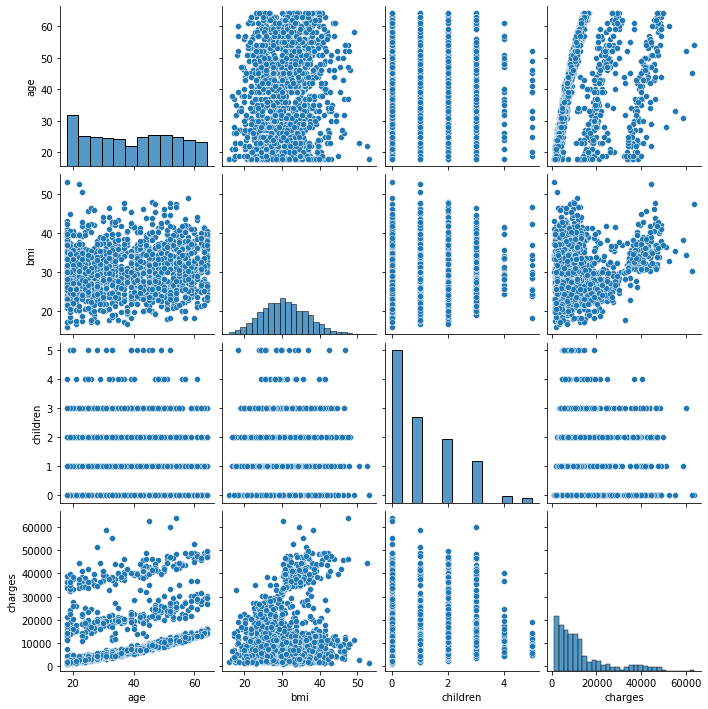

In [73]:
sns.pairplot(data)

El diagrama de pares o la matriz del diagrama de dispersión visualizan la relación entre las variables en una matriz.

***Visualización de la gráfica de dispersión 3D para ver la relación entre Edad, IMC y Prima del seguro***

In [74]:
fig = px.scatter_3d(data, x='age', y='bmi', z='charges', color= 'sex')
fig.show()

A medida que aumenta la edad, las prima de seguro también aumentan. Esto verifica el coeficiente de correlación de 0.3 entre edad y cargos. IMC con cargos muestra la misma relación pero más débil.

***Construyendo modelo de regresión***

In [75]:
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1,4,5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

***Codificar las variables categóricas***

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

***Entrena, prueba dividida 80/20***

In [86]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

***Modelo de ajuste***

In [78]:
y_pred = regressor.predict(X_test)
math.sqrt(mean_squared_error(y_test, y_pred))

5641.626558850191

Usando el error cuadrático medio de la raíz, podemos determinar la precisión de este modelo (cuán preciso puede predecir este modelo). Según el resultado de la regresión, podemos ver que la raíz del error cuadrático medio es 5641,62. RMSE es la desviación estándar de la variación aleatoria (errores de predicción). Por lo tanto, podemos esperar que este modelo prediga los cargos dentro de una desviación estándar de 5641.62.

In [79]:
r2_score(y_test, y_pred)
print(1 - (1-regressor.score(X, y))*(len(y)-1)/(len(y)-X.shape[1]-1))

0.7486872962661957


Podemos ver que el R2 es 0,799. Tenemos una regla de oro que cuando R2 es mayor que 0.7, indica que es un buen modelo. R2 es un número de variación sistemática sobre la variación total. Esto significa que el 79,9% de las variaciones son sistemáticas. Si queremos saber cuál es el porcentaje de variación aleatoria, podemos dejar 100-79,9 = 25,31%. Por tanto, el 20,1% son variaciones aleatorias, que es un número pequeño. Sin embargo, para evaluar la Regresión multivariable, necesitamos saber que al sumar x variables, R2 siempre aumenta. Por lo tanto, R2 ajustado proporciona una comparación de "manzanas con manzanas" de los modelos, que es 0,7469. Según la regla de oro, este sigue siendo un modelo muy razonable.

***Gráfica de residuales***

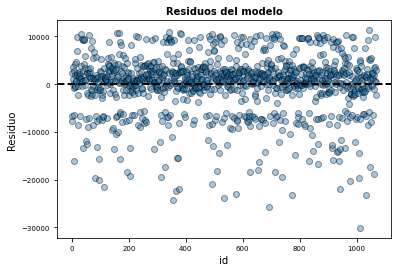

In [80]:
modelo  = sm.OLS(endog=y_train, exog=X_train,)
modelo  = modelo.fit()

#y_train = y_train.flatten()
prediccion_train = modelo.predict(exog = X_train)
residuos_train   = prediccion_train - y_train

plt.scatter(list(range(len(y_train))), residuos_train,edgecolors=(0, 0, 0), alpha = 0.4)
plt.axhline(y = 0, linestyle = '--', color = 'black', lw=2)
plt.title('Residuos del modelo', fontsize = 10, fontweight = "bold")
plt.xlabel('id')
plt.ylabel('Residuo')
plt.tick_params(labelsize = 7)

Los residuos no parecen distribuirse de forma aleatoria en torno a cero, sin mantener aproximadamente la misma variabilidad a lo largo del eje X. Este patrón apunta a una falta de homocedasticidad y de distribución normal.

***Valor predicho vs valor real***

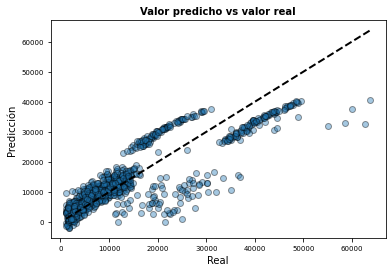

In [81]:
plt.scatter(y_train, prediccion_train, edgecolors=(0, 0, 0), alpha = 0.4)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', color = 'black', lw=2)
plt.title('Valor predicho vs valor real', fontsize = 10, fontweight = "bold")
plt.xlabel('Real')
plt.ylabel('Predicción')
plt.tick_params(labelsize = 7)

***Prueba de normalidad***

Normalidad de los residuos Shapiro-Wilk test

In [82]:
shapiro_test = stats.shapiro(residuos_train)
shapiro_test

(0.8938598036766052, 1.6209250413264958e-26)

Normalidad de los residuos D'Agostino's K-squared test

In [83]:
k2, p_value = stats.normaltest(residuos_train)
print(f"Estadítico= {k2}, p-value = {p_value}")

Estadítico= 256.82491194781437, p-value = 1.702860073779029e-56


Ambos test muestran claras evidencias para rechazar la hipótesis de que los datos se distribuyen de forma normal (p-value << 0.01).

***Prueba de significancia estadística (F-test)***

In [84]:
print(modelo.fvalue, modelo.f_pvalue)

371.70291774786295 1.8520437631823702e-301


Cuando no se cumple la condición de normalidad, estos valores no son fiables. Una mejor aproximación es recurrir a un test de permutación. Para ello, se simula la hipótesis nula de "no asociación entre la variable respuesta y todos predictores", intercambiando aleatoriamente la variable respuesta entre las observaciones.